<a href="https://colab.research.google.com/github/sandeepnie/Data-Science-Learning/blob/master/padhAI/CNN%20using%20Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data Loading. . .


In [49]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download = True,
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
classes = ('airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [52]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
1


## Visualization. . . 

In [53]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [54]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [55]:
npimg = np.transpose(npimg, (1,2,0))
print(npimg.shape)

(32, 32, 3)


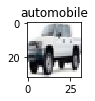

In [56]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.title(classes[labels[0]])
plt.show()

In [0]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()


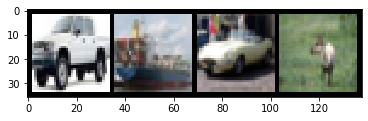

automobile   ship   automobile   deer


In [60]:
imshow(torchvision.utils.make_grid(images))
print('   '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,16,3, padding=(1,1), stride=(2,2))
  
  def forward(self,x):
    x = self.conv1(x)
    return x

In [0]:
net = FirstCNN()

In [80]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [81]:
for params in net.parameters():
  print(params.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [82]:
out1 = out[0,0,:,:].detach().numpy()
print(out1.shape)

(16, 16)


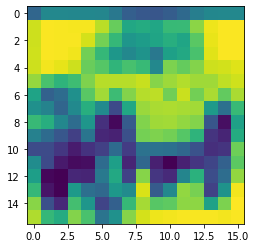

In [83]:
plt.imshow(out1)
plt.show()

## Deep Convolutional Layers

In [0]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),   #(N, 3, 32, 32) -> (N, 8, 30, 30)
        nn.Conv2d(8, 16, 3)   #(N, 8, 30, 30) -> (N, 16, 28, 28)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [87]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

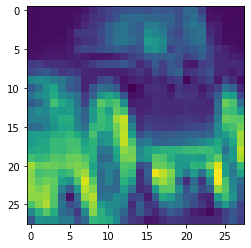

In [88]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

In [0]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5),         #(N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.AvgPool2d(2, stride= 2), #(N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.AvgPool2d(2, stride=2)   #(N, 16, 10, 10) -> (N, 16, 5, 5)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [93]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

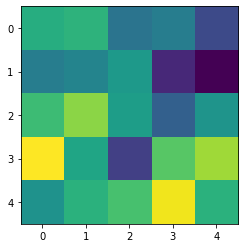

In [94]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

## Class LeNet

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5), #( N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2), #(N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5), #(N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2) #(N, 16, 10, 10) -> (N, 16, 5, 5)
    )

    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),  #(N, 400) -> (N, 120)
        nn.Tanh(),
        nn.Linear(120, 84), #(N, 120) -> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10) #(N, 84) -> (N, 10)
    )

  def forward(self,x):
    print(x.shape)
    x = self.cnn_model(x)
    print(x.shape)
    x = x.view(x.size(0), -1)
    print(x.shape)
    x = self.fc_model(x)
    print(x.shape)
    return x


In [97]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [98]:
print(out)

tensor([[-3.7855e-02,  2.6387e-03, -5.9843e-02, -1.0336e-01, -3.7666e-02,
          9.2923e-02, -1.0639e-01,  3.0272e-02,  1.7068e-02,  4.2671e-02],
        [-2.1070e-02, -7.3861e-03, -6.5245e-02, -1.1836e-01, -4.1900e-02,
          1.0876e-01, -1.0537e-01,  4.0671e-02, -1.0525e-03,  6.1762e-02],
        [-5.9393e-02, -3.7840e-02, -4.8246e-02, -8.7821e-02, -6.7864e-05,
          1.1003e-01, -8.4397e-02,  9.9374e-03,  7.6043e-03,  3.3011e-02],
        [-4.0432e-02, -1.8665e-02, -6.9168e-02, -8.5254e-02, -2.7898e-02,
          1.1027e-01, -1.0461e-01,  1.8780e-02,  1.4171e-02,  5.3502e-02]],
       grad_fn=<AddmmBackward>)


In [99]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([5, 5, 5, 5])
